In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
import geopandas as gpd

## Data Sets

In [6]:
rainfall = pd.read_excel(r"rainfall.xlsx",engine='openpyxl')
temperature = pd.read_excel(r"temperature.xlsx",engine='openpyxl')
co2Levels = pd.read_csv(r"annual-co2-emissions-per-country.csv")
cropsProduction = pd.read_csv(r"crop_production.csv")
cropRecommedation = pd.read_csv(r"Crop_recommendation.csv")
soil = pd.read_excel(r"statewiseSoil.xlsx",engine='openpyxl')



# Data Preprocessing

For rainfall dataset

In [7]:
rainfall

,Unnamed: 0,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,952.79,999.69,1121.12,934.47,915.86,1064.22,962.00,1066.40,1095.83,...,1089.24,1018.89,1196.86,999.89,1085.10,1065.11,1108.30,974.76,1244.56,1168.82
1,Andaman and Nicobar,3498.39,3426.30,3133.18,3240.51,2672.37,2661.60,3226.91,3701.89,3835.90,...,3492.29,3477.63,3383.51,3044.67,2988.46,3637.20,3320.99,3506.83,2905.48,3142.94
2,Andhra Pradesh,750.30,818.72,1273.42,627.19,699.43,866.68,688.60,791.92,725.63,...,790.16,933.93,1066.01,843.08,890.02,929.87,963.55,797.03,1014.85,1102.54
3,Assam,2395.29,2383.24,2454.20,2292.81,2534.76,2218.42,2042.73,2453.43,2265.90,...,1804.17,2190.88,2198.26,1849.63,2293.47,2030.19,2481.77,1781.36,2009.36,2437.59
4,Delhi,653.96,631.62,575.69,783.10,430.39,664.39,586.70,905.34,900.07,...,806.08,815.62,822.01,529.65,641.47,652.88,766.80,775.71,655.05,650.47
5,Goa,2225.70,2761.60,2539.02,2162.38,1408.39,2359.54,2700.54,2829.42,2243.24,...,2454.86,1644.98,2295.87,2451.22,1604.35,2095.76,1786.16,1767.07,3819.41,3208.92
6,Gujarat,372.20,687.99,743.44,314.29,431.08,743.57,686.55,714.62,751.07,...,751.34,531.50,862.81,819.33,660.81,675.45,857.79,511.94,956.07,823.07
7,Haryana,528.30,506.39,494.03,610.26,369.75,568.31,511.24,801.37,800.98,...,720.36,673.85,767.30,523.63,623.53,604.60,640.74,664.31,592.79,614.39
8,Himachal Pradesh,737.89,605.63,716.18,746.54,661.02,788.13,721.72,836.84,1029.66,...,840.31,653.10,915.59,769.17,1003.68,698.47,898.52,790.07,868.26,737.07
9,Karnataka,994.55,1056.61,1335.26,934.47,762.94,1113.37,1063.35,930.24,1044.42,...,1101.94,803.90,1106.48,1188.62,932.42,938.81,1079.15,912.75,1394.03,1344.10


In [8]:
rainfall.rename(columns={"Unnamed: 0":"state"},inplace=True) #naming the unnamed column

It is observed that there exists a value "Administrative unit not available" in the state column since the region this information belonged to could not be determined we are dropping the rows

In [9]:
rainfall.drop(rainfall.loc[rainfall['state'] == "Administrative unit not available"].index, inplace = True,axis=0)

We are considering only the previous 30 years for our analysis hence we are removing the columns prior to 1991

In [10]:
year = list(range(1901, 1991))
rainfall.drop(year, axis = 1, inplace = True)

# Analysing for missing values

In [11]:
missingValues = rainfall.isnull().sum() * 100 / len(rainfall)
missingValuesDf = pd.DataFrame({'column_name': rainfall.columns,
                                 'percent_missing': missingValues})
missingValuesDfmissingValues = rainfall.isnull().sum() * 100 / len(rainfall)
missingValuesDf = pd.DataFrame({'column_name': rainfall.columns,
                                 'percent_missing': missingValues})
missingValuesDf

,column_name,percent_missing
state,state,0.0
1991,1991,0.0
1992,1992,0.0
1993,1993,0.0
1994,1994,0.0
1995,1995,0.0
1996,1996,0.0
1997,1997,0.0
1998,1998,0.0
1999,1999,0.0


There are no missing values

## Analysis for Outliers

<AxesSubplot:>

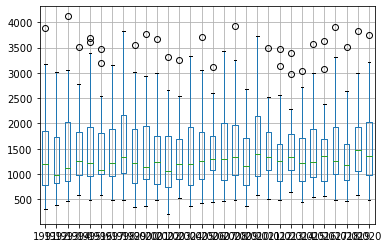

In [12]:
plt.rcParams["figure.figsize"] = (20,4)
rainfall.boxplot()

From the boxplots we can observe that outliers exist hence we replace the points above the upper limit with the 90th percentile values and the points below the lower limit with 10th percentile values

In [13]:
for x in range(1991,2021):
                         upper_limit = rainfall[x].quantile(0.9)
                         lower_limit = rainfall[x].quantile(0.1)
                         rainfall[x] = np.where(rainfall[x] >= upper_limit,upper_limit,np.where(rainfall[x] <= lower_limit,lower_limit, rainfall[x]))   

<AxesSubplot:>

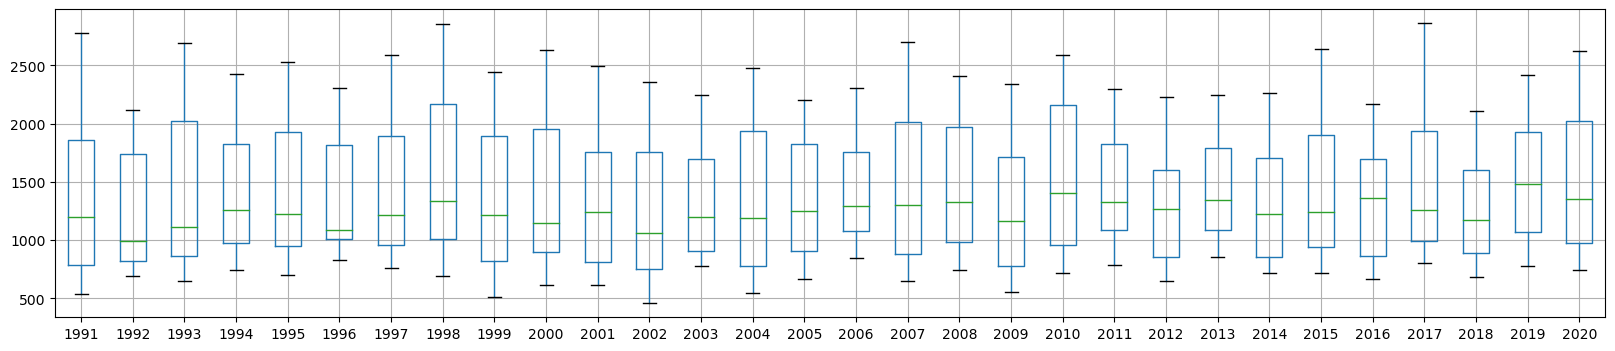

In [14]:
plt.rcParams["figure.figsize"] = (20,4)
rainfall.boxplot() #after removing outliers

In [15]:
rainfall

,state,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,986.160,915.330,1013.560,1096.830,1087.530,1056.670,1072.24,1132.360,1013.190,...,1089.240,1018.890,1196.860,999.890,1085.100,1065.110,1108.300,974.760,1244.560,1168.820
1,Andaman and Nicobar,2776.414,2116.318,2695.164,2426.766,2527.150,2305.632,2593.29,2855.644,2445.234,...,2300.458,2231.434,2246.474,2261.608,2640.350,2170.394,2862.530,2112.152,2416.266,2621.766
2,Andhra Pradesh,972.300,823.020,779.230,936.830,1131.640,1019.270,937.84,1011.970,735.000,...,790.160,933.930,1066.010,843.080,890.020,929.870,963.550,797.030,1014.850,1102.540
3,Assam,2656.600,2116.318,2607.600,2013.640,2447.050,2214.570,2154.55,2587.290,2275.320,...,1804.170,2190.880,2198.260,1849.630,2293.470,2030.190,2481.770,1781.360,2009.360,2437.590
4,Delhi,561.490,692.216,784.510,818.300,755.380,834.500,760.96,767.030,515.090,...,806.080,815.620,857.212,718.392,719.338,665.538,803.196,775.710,779.142,743.434
5,Goa,1802.260,2116.318,2232.930,2426.766,2527.150,1747.680,2593.29,2202.970,2111.240,...,2300.458,1644.980,2246.474,2261.608,1604.350,2095.760,1786.160,1767.070,2416.266,2621.766
6,Gujarat,533.932,692.216,650.292,937.890,702.016,827.450,795.91,891.540,532.880,...,784.034,652.302,862.810,819.330,719.338,675.450,857.790,686.974,956.070,823.070
7,Haryana,533.932,692.216,650.292,743.462,702.016,827.450,760.96,695.414,515.090,...,784.034,673.850,857.212,718.392,719.338,665.538,803.196,686.974,779.142,743.434
8,Himachal Pradesh,621.910,796.250,678.060,743.462,898.440,861.970,815.02,695.414,679.770,...,840.310,653.100,915.590,769.170,1003.680,698.470,898.520,790.070,868.260,743.434
9,Karnataka,1002.510,962.080,999.550,1136.940,1236.890,1019.740,1111.33,1186.290,940.080,...,1101.940,803.900,1106.480,1188.620,932.420,938.810,1079.150,912.750,1394.030,1344.100


## Preprocessing for Temperature dataset

In [16]:
temperature

,Unnamed: 0,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,24.26,24.52,23.96,24.02,23.87,24.11,23.97,24.01,23.92,...,24.82,24.77,24.64,24.77,24.89,25.27,25.15,25.00,24.94,24.80
1,Andaman and Nicobar,27.81,27.84,27.63,27.29,27.80,27.92,27.31,27.24,27.25,...,27.15,27.47,27.40,27.44,27.65,27.69,27.58,27.32,27.76,27.80
2,Andhra Pradesh,27.04,27.36,26.77,26.83,26.96,27.15,26.92,26.85,26.92,...,27.81,28.06,27.78,28.02,28.05,28.23,28.29,28.03,28.37,28.06
3,Assam,22.77,22.50,22.73,22.51,22.11,22.64,22.52,22.86,22.97,...,23.53,23.05,23.14,23.52,23.25,23.58,23.57,23.21,23.44,23.33
4,Delhi,25.27,25.52,24.90,24.95,24.65,24.87,24.66,24.84,24.41,...,25.49,25.32,25.31,25.21,25.51,26.45,26.07,26.03,25.28,25.31
5,Goa,26.26,26.64,25.96,26.07,26.13,26.28,26.18,26.02,26.16,...,26.94,27.14,26.96,27.22,27.33,27.25,27.39,27.27,27.39,27.28
6,Gujarat,26.66,27.19,26.20,26.59,26.25,26.31,26.42,26.10,26.09,...,27.23,27.00,27.00,27.28,27.62,27.61,27.56,27.74,27.41,27.44
7,Haryana,25.09,25.34,24.68,24.77,24.43,24.69,24.48,24.62,24.22,...,25.27,25.09,25.20,25.01,25.24,26.17,25.84,25.84,25.06,25.09
8,Himachal Pradesh,9.80,10.01,9.40,9.57,9.03,9.52,9.25,9.53,9.14,...,10.23,10.03,10.20,9.91,10.17,11.18,10.78,10.74,9.95,10.07
9,Karnataka,25.44,25.75,25.18,25.22,25.38,25.51,25.34,25.22,25.33,...,26.16,26.39,26.18,26.41,26.46,26.51,26.59,26.44,26.67,26.51


In [17]:
temperature.rename(columns={"Unnamed: 0":"state"},inplace=True) #naming the unnamed column

It is observed that there exists a value "Administrative unit not available" in the state column since the region this information belonged to could not be determined we are dropping the rows

In [18]:
temperature.drop(temperature.loc[temperature['state'] == "Administrative unit not available"].index, inplace = True,axis=0)

We are considering only the previous 30 years for our analysis hence we are removing the columns prior to 1991

In [19]:
year = list(range(1901, 1991))
temperature.drop(year, axis = 1, inplace = True)

In [20]:
# Analysing for missing values
missingValues = temperature.isnull().sum() * 100 / len(temperature)
missingValuesDf = pd.DataFrame({'column_name': temperature.columns,
                                 'percent_missing': missingValues})
missingValuesDfmissingValues = temperature.isnull().sum() * 100 / len(temperature)
missingValuesDf = pd.DataFrame({'column_name': temperature.columns,
                                 'percent_missing': missingValues})
missingValuesDf

,column_name,percent_missing
state,state,0.0
1991,1991,0.0
1992,1992,0.0
1993,1993,0.0
1994,1994,0.0
1995,1995,0.0
1996,1996,0.0
1997,1997,0.0
1998,1998,0.0
1999,1999,0.0


No missing valuesThere are no missing values

## Analysis for Outliers

<AxesSubplot:>

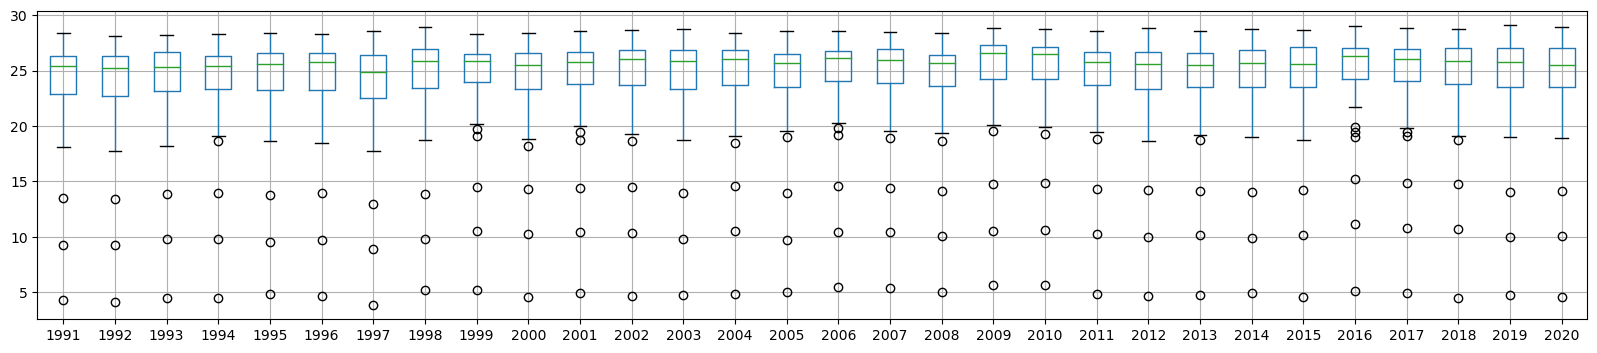

In [21]:
plt.rcParams["figure.figsize"] = (20,4)
temperature.boxplot()

From the boxplots we can observe that outliers exist hence we replace the points above the upper limit with the 90th percentile values and the points below the lower limit with 10th percentile values

In [22]:
for x in range(1991,2021):
                         upper_limit = temperature[x].quantile(0.9)
                         lower_limit = temperature[x].quantile(0.1)
                         temperature[x] = np.where(temperature[x] >= upper_limit,upper_limit,np.where(temperature[x] <= lower_limit,lower_limit, temperature[x]))   

There are no Outliers

<AxesSubplot:>

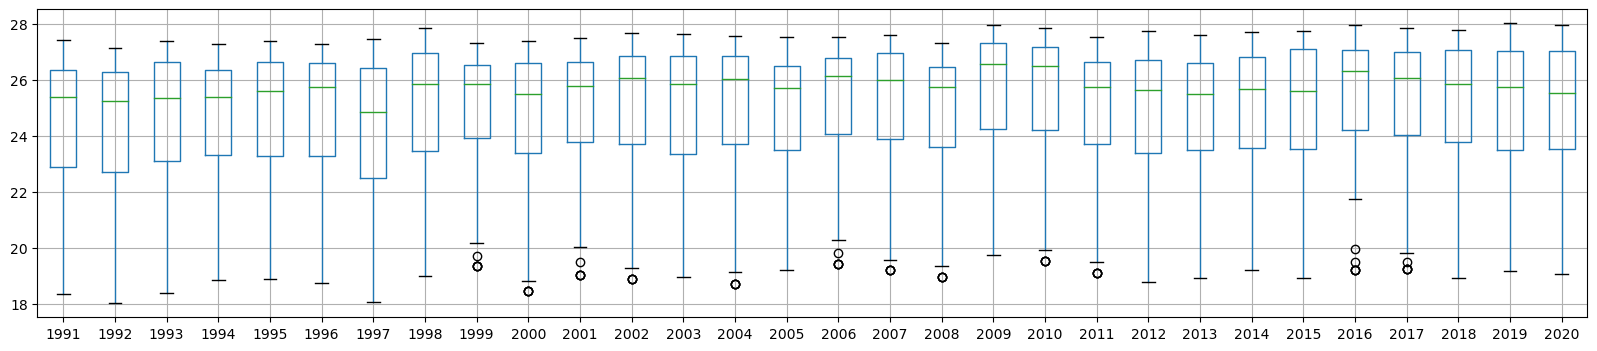

In [23]:
temperature.boxplot()

After removing outliers

In [24]:
temperature

,state,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,24.460,24.340,24.580,24.440,24.590,24.660,24.180,24.930,24.820,...,24.820,24.770,24.640,24.770,24.890,25.270,25.150,25.000,24.940,24.800
1,Andaman and Nicobar,27.290,26.900,27.170,27.070,27.150,26.940,27.100,27.500,26.680,...,27.150,27.470,27.400,27.440,27.650,27.690,27.580,27.320,27.760,27.800
2,Andhra Pradesh,27.428,27.128,27.370,27.268,27.376,27.288,27.466,27.842,27.308,...,27.506,27.746,27.580,27.686,27.740,27.966,27.826,27.788,28.012,27.956
3,Assam,22.660,22.460,22.740,23.130,23.340,23.180,22.540,23.500,23.770,...,23.530,23.050,23.140,23.520,23.250,23.580,23.570,23.210,23.440,23.330
4,Delhi,24.810,24.740,25.200,25.120,25.030,25.150,24.000,25.080,25.610,...,25.490,25.320,25.310,25.210,25.510,26.450,26.070,26.030,25.280,25.310
5,Goa,26.660,26.620,26.690,26.550,26.720,26.800,26.820,27.260,26.630,...,26.940,27.140,26.960,27.220,27.330,27.250,27.390,27.270,27.390,27.280
6,Gujarat,26.670,26.760,27.370,26.880,27.160,27.060,26.570,27.450,27.170,...,27.230,27.000,27.000,27.280,27.620,27.610,27.560,27.740,27.410,27.440
7,Haryana,24.630,24.480,24.990,24.930,24.790,24.820,23.740,24.890,25.440,...,25.270,25.090,25.200,25.010,25.240,26.170,25.840,25.840,25.060,25.090
8,Himachal Pradesh,18.330,18.012,18.382,18.852,18.878,18.738,18.074,18.980,19.342,...,19.096,18.780,18.898,19.212,18.902,19.190,19.242,18.908,19.170,19.062
9,Karnataka,25.990,25.830,25.900,25.790,25.930,25.990,26.120,26.480,25.850,...,26.160,26.390,26.180,26.410,26.460,26.510,26.590,26.440,26.670,26.510


## Preprocessing for co2Levels dataset

In [25]:
co2Levels

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256
...,...,...,...,...
24665,Zimbabwe,ZWE,2016,10737567
24666,Zimbabwe,ZWE,2017,9581633
24667,Zimbabwe,ZWE,2018,11854367
24668,Zimbabwe,ZWE,2019,10949084


Since we are only counsider India and years from 1991 we remove the resto of the rows

In [26]:
co2Levels.drop(co2Levels[(co2Levels['Entity'] != "India") | (co2Levels['Year']<1991)].index, inplace = True,axis=0)

We are removing the co2 levels enitity and code as the data belongs to a single country

In [27]:
co2Levels.drop(['Code', 'Entity'],axis=1,inplace=True)
co2Levels.reset_index(drop=True,inplace=True) #removing index column

In [28]:
co2Levels

,Year,Annual CO2 emissions
0,1991,615924923
1,1992,656033132
2,1993,677916275
3,1994,716917563
4,1995,762120642
5,1996,825918856
6,1997,859686238
7,1998,877698067
8,1999,951748674
9,2000,978919215


It can be observed that there are no missing values

## Analysisng for Outliers

<AxesSubplot:>

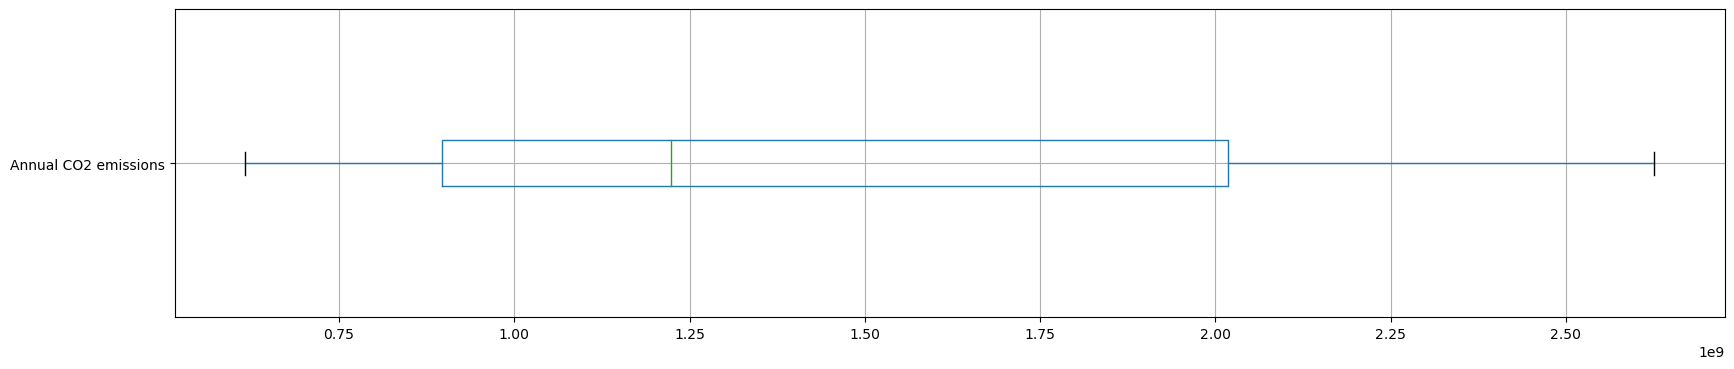

In [29]:
co2Levels.boxplot(column=['Annual CO2 emissions'],vert=False)

No outliers

# Preprocessing for Crop Production

In [30]:
cropsProduction

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [31]:
cropsProduction.drop(['District_Name'],axis=1,inplace=True)
cropsProduction.groupby(['State_Name','Crop_Year','Season','Crop']).agg({'Area' : ['sum'],'Production' : ['sum']},inplace=True).reset_index()



,State_Name,Crop_Year,Season,Crop,Area,Production
,,,,,sum,sum
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,4354.0,7200.0
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,670.0,449.0
2,Andaman and Nicobar Islands,2000,Kharif,Rice,10881.0,32184.0
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1707.0,12714.0
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,800.0,219.0
...,...,...,...,...,...,...
15502,West Bengal,2014,Summer,Sesamum,222239.0,206994.0
15503,West Bengal,2014,Whole Year,Sugarcane,17728.0,2105506.0
15504,West Bengal,2014,Whole Year,Tobacco,14230.0,23828.0


In [32]:
cropsProduction.columns = ['State_Name','Crop_Year','Season','Crop','Area','Production']
cropsProduction

,State_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...
246086,West Bengal,2014,Summer,Rice,306.0,801.0
246087,West Bengal,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,2014,Winter,Rice,279151.0,597899.0


In [33]:
season = np.unique(cropsProduction['Season'])

In [34]:
season

array(['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ', 'Winter     '], dtype=object)

Since Whole year contains the sum

In [35]:
cropsProduction.drop(cropsProduction[cropsProduction['Season'] != "Whole Year "].index, inplace = True,axis=0)
cropsProduction.drop('Season',axis=1,inplace=True)

In [36]:
cropsProduction = cropsProduction.reset_index(drop=True)
cropsProduction

,State_Name,Crop_Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Banana,176.0,641.0
1,Andaman and Nicobar Islands,2000,Cashewnut,720.0,165.0
2,Andaman and Nicobar Islands,2000,Coconut,18168.0,65100000.0
3,Andaman and Nicobar Islands,2000,Dry ginger,36.0,100.0
4,Andaman and Nicobar Islands,2000,Sugarcane,1.0,2.0
...,...,...,...,...,...
57300,West Bengal,2010,Sugarcane,303.0,11541.0
57301,West Bengal,2011,Sugarcane,303.0,20264.0
57302,West Bengal,2012,Sugarcane,314.0,11199.0
57303,West Bengal,2013,Sugarcane,161.0,7948.0


Analysis For missing values

In [37]:
missingValues = cropsProduction.isnull().sum() * 100 / len(cropsProduction)
missingValuesDf = pd.DataFrame({'column_name': cropsProduction.columns,
                                 'percent_missing': missingValues})
missingValuesDfmissingValues = cropsProduction.isnull().sum() * 100 / len(cropsProduction)
missingValuesDf = pd.DataFrame({'column_name': cropsProduction.columns,
                                 'percent_missing': missingValues})
missingValuesDf

,column_name,percent_missing
State_Name,State_Name,0.000000
Crop_Year,Crop_Year,0.000000
Crop,Crop,0.000000
Area,Area,0.000000
Production,Production,2.055667


In [38]:
null_data = cropsProduction[cropsProduction.isnull().any(axis=1)]
null_data

,State_Name,Crop_Year,Crop,Area,Production
36,Andaman and Nicobar Islands,2005,Arecanut,795.67,NaN
41,Andaman and Nicobar Islands,2005,Dry chillies,17.00,NaN
583,Andhra Pradesh,2013,Sannhamp,175.00,NaN
599,Andhra Pradesh,2000,Tobacco,2345.00,NaN
719,Andhra Pradesh,2013,Sannhamp,2594.00,NaN
...,...,...,...,...,...
55399,Uttarakhand,2003,Garlic,24.00,NaN
55444,Uttarakhand,2000,Turmeric,132.00,NaN
55449,Uttarakhand,2002,Dry ginger,5.00,NaN
55510,Uttarakhand,2003,Garlic,12.00,NaN


In [39]:
cropsProduction.dropna(how='any',inplace=True)

<AxesSubplot:>

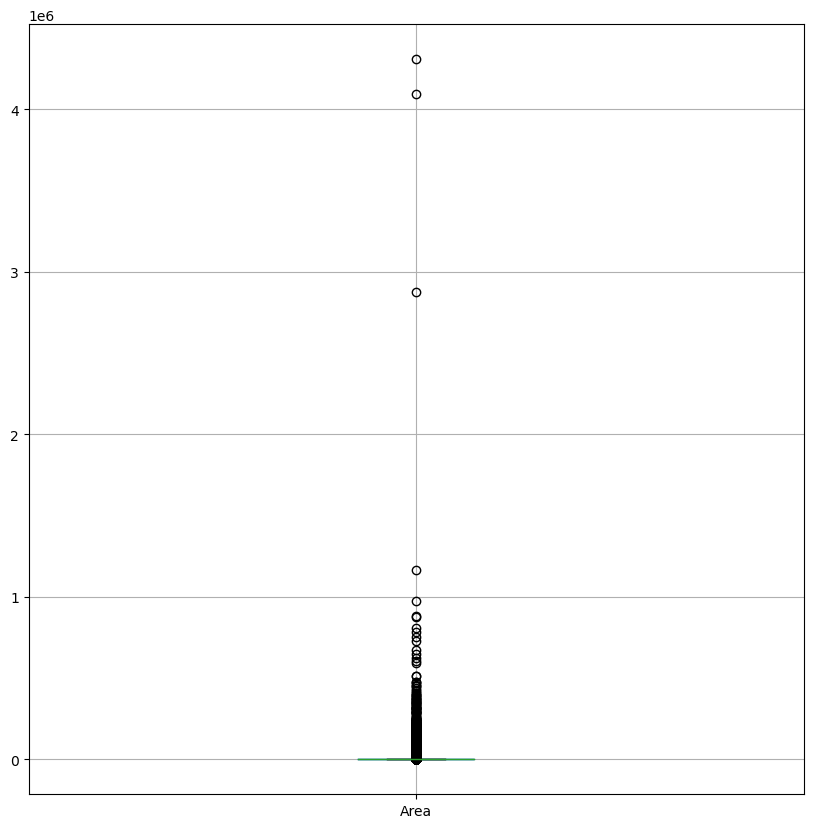

In [40]:
plt.rcParams["figure.figsize"] = (10,10)
cropsProduction.boxplot(['Area'])

c:\Users\sitan\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Production'>

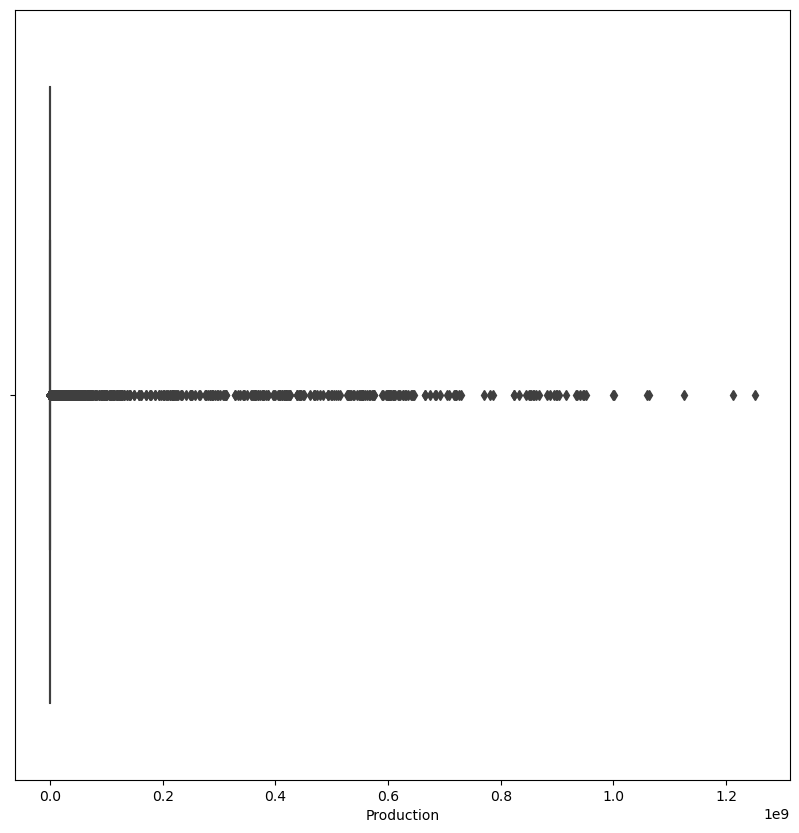

In [41]:
sns.boxplot(cropsProduction['Production'])

In [42]:
upper_limit = cropsProduction['Production'].quantile(0.8)
lower_limit = cropsProduction['Production'].quantile(0.2)
cropsProduction['Production'] = np.where(cropsProduction['Production'] >= upper_limit,upper_limit,np.where(cropsProduction['Production'] <= lower_limit,lower_limit, cropsProduction['Production'])) 
    

c:\Users\sitan\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Production'>

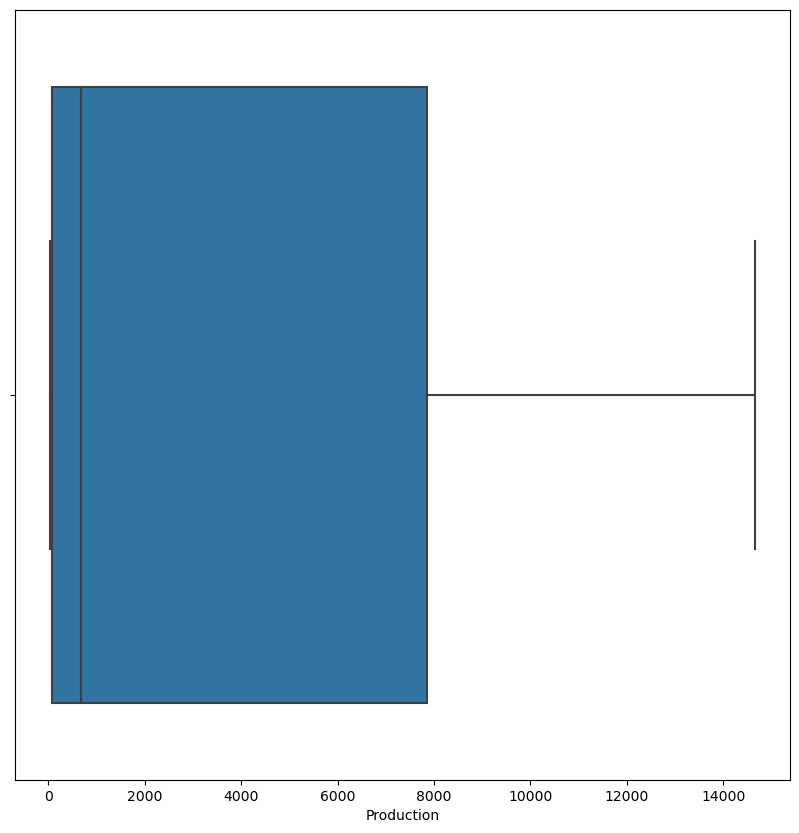

In [43]:
sns.boxplot(cropsProduction['Production'])

In [44]:
cropsProduction

,State_Name,Crop_Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Banana,176.0,641.0
1,Andaman and Nicobar Islands,2000,Cashewnut,720.0,165.0
2,Andaman and Nicobar Islands,2000,Coconut,18168.0,14653.0
3,Andaman and Nicobar Islands,2000,Dry ginger,36.0,100.0
4,Andaman and Nicobar Islands,2000,Sugarcane,1.0,35.0
...,...,...,...,...,...
57300,West Bengal,2010,Sugarcane,303.0,11541.0
57301,West Bengal,2011,Sugarcane,303.0,14653.0
57302,West Bengal,2012,Sugarcane,314.0,11199.0
57303,West Bengal,2013,Sugarcane,161.0,7948.0


### Preprocessing for CropRecommedations

In [45]:
cropRecommedation

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


This data set is converted into a range of values for the attributes in order to compare and find the best fit for the crops and region given

In [46]:
newColumns = ['N-max','N-min','P-max','P-min','K-max','K-min','temperature-max','temperature-min','ph-max','ph-min','rainfall-max','rainfall-min','humidity-max','humidity-min']

df1 =cropRecommedation.groupby(['label'])['N','P','K','temperature','humidity','ph','rainfall'].min()
df1.rename(columns = {"N":'N-min',"P":"P-min","K":"K-min", "humidity":"humidity-min", "ph":"ph-min", "rainfall":"rainfall-min","temperature":"temperature-min"},inplace=True)

df2=cropRecommedation.groupby(['label'])['N','P','K','temperature','humidity','ph','rainfall'].max()
df2.rename(columns = {"N":'N-max',"P":"P-max","K":"K-max", "humidity":"humidity-max", "ph":"ph-max", "rainfall":"rainfall-max","temperature":"temperature-max"},inplace=True)

cropRecommedation = pd.concat([df1,df2],axis = 1)
cropRecommedation =cropRecommedation[newColumns]
cropRecommedation

C:\Users\sitan\AppData\Local\Temp\ipykernel_15824\2122017069.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 =cropRecommedation.groupby(['label'])['N','P','K','temperature','humidity','ph','rainfall'].min()
C:\Users\sitan\AppData\Local\Temp\ipykernel_15824\2122017069.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=cropRecommedation.groupby(['label'])['N','P','K','temperature','humidity','ph','rainfall'].max()


,N-max,N-min,P-max,P-min,K-max,K-min,temperature-max,temperature-min,ph-max,ph-min,rainfall-max,rainfall-min,humidity-max,humidity-min
label,,,,,,,,,,,,,,
apple,40,0,145,120,205,195,23.996862,21.036527,6.499227,5.514253,124.983162,100.117344,94.920481,90.025751
banana,120,80,95,70,55,45,29.908885,25.010185,6.490074,5.505394,119.847970,90.109781,84.978492,75.031933
blackgram,60,20,80,55,25,15,34.946616,25.097374,7.775306,6.500145,74.915595,60.417903,69.961000,60.065349
chickpea,60,20,80,55,85,75,20.995022,17.024985,8.868741,5.988993,94.781896,65.113656,19.969789,14.258040
coconut,40,0,30,5,35,25,29.869083,25.008724,6.470466,5.501580,225.632366,131.090008,99.981876,90.017345
coffee,120,80,40,15,35,25,27.923744,23.059519,7.493192,6.020947,199.473564,115.156401,69.948073,50.045570
cotton,140,100,60,35,25,15,25.992374,22.000851,7.994680,5.801048,99.931008,60.653817,84.876690,75.005393
grapes,40,0,145,120,205,195,41.948657,8.825675,6.499605,5.510925,74.915062,65.010953,83.983517,80.016394
jute,100,60,60,35,45,35,26.985822,23.094338,7.488014,6.002525,199.836291,150.235524,89.891065,70.882596


In [47]:
cropRecommedation

,N-max,N-min,P-max,P-min,K-max,K-min,temperature-max,temperature-min,ph-max,ph-min,rainfall-max,rainfall-min,humidity-max,humidity-min
label,,,,,,,,,,,,,,
apple,40,0,145,120,205,195,23.996862,21.036527,6.499227,5.514253,124.983162,100.117344,94.920481,90.025751
banana,120,80,95,70,55,45,29.908885,25.010185,6.490074,5.505394,119.847970,90.109781,84.978492,75.031933
blackgram,60,20,80,55,25,15,34.946616,25.097374,7.775306,6.500145,74.915595,60.417903,69.961000,60.065349
chickpea,60,20,80,55,85,75,20.995022,17.024985,8.868741,5.988993,94.781896,65.113656,19.969789,14.258040
coconut,40,0,30,5,35,25,29.869083,25.008724,6.470466,5.501580,225.632366,131.090008,99.981876,90.017345
coffee,120,80,40,15,35,25,27.923744,23.059519,7.493192,6.020947,199.473564,115.156401,69.948073,50.045570
cotton,140,100,60,35,25,15,25.992374,22.000851,7.994680,5.801048,99.931008,60.653817,84.876690,75.005393
grapes,40,0,145,120,205,195,41.948657,8.825675,6.499605,5.510925,74.915062,65.010953,83.983517,80.016394
jute,100,60,60,35,45,35,26.985822,23.094338,7.488014,6.002525,199.836291,150.235524,89.891065,70.882596


The dataset does not contain the soil required and has only a few crops hence upon adding those values we get 

In [48]:
cropRecommedation = pd.read_csv(r"cropRecommendation.csv")
cropRecommedation

,index,label,N-max,N-min,P-max,P-min,K-max,K-min,temperature-max,temperature-min,...,black soil,clay soil,loam soil,laterite soil,arid soil,sandy,sandy clayey,sandy silty,loamy silty,sandy loam
0,0,apple,40,0,145,120,205,195,23.996862,21.036527,...,0,0,1,0,0,0,0,0,0,0
1,1,banana,120,80,95,70,55,45,29.908885,25.010185,...,0,0,1,0,0,0,0,0,0,0
2,2,blackgram,60,20,80,55,25,15,34.946616,25.097374,...,1,0,0,0,0,1,1,1,0,0
3,3,chickpea,60,20,80,55,85,75,20.995022,17.024985,...,1,0,1,0,0,0,0,0,0,0
4,4,coconut,40,0,30,5,35,25,29.869083,25.008724,...,0,0,1,1,0,1,0,1,0,1
5,5,coffee,120,80,40,15,35,25,27.923744,23.059519,...,0,0,0,1,0,0,0,0,1,1
6,6,cotton,140,100,60,35,25,15,25.992374,22.000851,...,1,1,0,1,1,0,0,0,0,0
7,7,grapes,40,0,145,120,205,195,41.948657,8.825675,...,0,0,1,0,0,0,1,1,0,1
8,8,jute,100,60,60,35,45,35,26.985822,23.094338,...,1,1,1,0,0,0,0,0,0,1
9,9,kidneybeans,40,0,80,55,25,15,24.923601,15.330426,...,0,1,1,0,0,0,0,0,0,0


### Soil Dataset

In [49]:
soil

,State,red yellow soil,loamy clayey soil,sand loamy clayey soil,black soil,clay soil,loam soil,laterite soil,arid soil,sandy,sandy clayey,sandy silty,loamy silty,sandy loam,silt loamy clayey soil
0,Andhra Pradesh,1,0,1,1,0,0,1,0,0,0,0,1,0,0
1,Arunachal Pradesh,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,Assam,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,Bihar,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Chhattisgarh,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Goa,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6,Gujarat,1,0,1,1,0,0,0,0,0,0,0,0,0,0
7,Haryana,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8,Himachal Pradesh,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,Jharkhand,1,0,1,1,0,0,0,0,0,0,0,0,0,0


This data set cotains the type of soil in each state, no preprocessing required

# Model Building

### For Rainfall 

In [50]:
rain=rainfall.copy(deep=True)
rain

,state,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,986.160,915.330,1013.560,1096.830,1087.530,1056.670,1072.24,1132.360,1013.190,...,1089.240,1018.890,1196.860,999.890,1085.100,1065.110,1108.300,974.760,1244.560,1168.820
1,Andaman and Nicobar,2776.414,2116.318,2695.164,2426.766,2527.150,2305.632,2593.29,2855.644,2445.234,...,2300.458,2231.434,2246.474,2261.608,2640.350,2170.394,2862.530,2112.152,2416.266,2621.766
2,Andhra Pradesh,972.300,823.020,779.230,936.830,1131.640,1019.270,937.84,1011.970,735.000,...,790.160,933.930,1066.010,843.080,890.020,929.870,963.550,797.030,1014.850,1102.540
3,Assam,2656.600,2116.318,2607.600,2013.640,2447.050,2214.570,2154.55,2587.290,2275.320,...,1804.170,2190.880,2198.260,1849.630,2293.470,2030.190,2481.770,1781.360,2009.360,2437.590
4,Delhi,561.490,692.216,784.510,818.300,755.380,834.500,760.96,767.030,515.090,...,806.080,815.620,857.212,718.392,719.338,665.538,803.196,775.710,779.142,743.434
5,Goa,1802.260,2116.318,2232.930,2426.766,2527.150,1747.680,2593.29,2202.970,2111.240,...,2300.458,1644.980,2246.474,2261.608,1604.350,2095.760,1786.160,1767.070,2416.266,2621.766
6,Gujarat,533.932,692.216,650.292,937.890,702.016,827.450,795.91,891.540,532.880,...,784.034,652.302,862.810,819.330,719.338,675.450,857.790,686.974,956.070,823.070
7,Haryana,533.932,692.216,650.292,743.462,702.016,827.450,760.96,695.414,515.090,...,784.034,673.850,857.212,718.392,719.338,665.538,803.196,686.974,779.142,743.434
8,Himachal Pradesh,621.910,796.250,678.060,743.462,898.440,861.970,815.02,695.414,679.770,...,840.310,653.100,915.590,769.170,1003.680,698.470,898.520,790.070,868.260,743.434
9,Karnataka,1002.510,962.080,999.550,1136.940,1236.890,1019.740,1111.33,1186.290,940.080,...,1101.940,803.900,1106.480,1188.620,932.420,938.810,1079.150,912.750,1394.030,1344.100


In [51]:
def func(value):
    f=rain.iloc[value,1:]
    g=f.to_numpy() #conversion of series to array
    return g

In [52]:
list1=[]
for x in range(1991,2021):
    list1.append(x)


In [53]:
def func_rainfall(value):
    sns.set(rc={'figure.figsize':(20,8)})
    sns.scatterplot(x=list1,y=func(value))
    # sns.scatterplot(x=list1,y=list3,color='b')
    # sns.scatterplot(x=list1,y=list4,color='r')
    x=rain.iloc[value,0]
    plt.legend(labels=[x],loc='upper right')
    plt.xticks(list1)
    plt.xlabel("years")
    plt.ylabel("states")

In [54]:

def polynomial_fit_rainfall(value): #value represents index value of state you want to fit a model
    X=np.array(list1).reshape((-1,1))
    y=func(value)

 
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(X)
 
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    y_poly=lin2.predict(X_poly)
 
    plt.scatter(X, y, color = 'blue')
    plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
    
    plt.title('Polynomial Regression')
    x=rain.iloc[value,0]
    plt.legend(labels=[x,"Regression line"],loc='upper right')
    plt.xlabel('Years')
    plt.ylabel('Value in mm')
    plt.show()



In [55]:
def goodness_fit_rainfall(value): #value represents index value of state you want to fit a model
    X=np.array(list1).reshape((-1,1))
    y=func(value)

 
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(X)
 
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    y_poly=lin2.predict(X_poly)
    rmse=np.sqrt(mean_squared_error(y,y_poly))
    r2=r2_score(y,y_poly)
    print(rmse)
    print(r2)
   



In [56]:
def prediction_rainfall(value,value1): #value represents index value of state you want to fit a model and value1 represents the year which you want to get predicted year temperature
    X=np.array(list1).reshape((-1,1))
    y=func(value)

 
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(X)
 
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    y_poly=lin2.predict(X_poly)
    # Predicting a new result with Polynomial Regression after converting predict variable to 2D array
    pred2 = value1
    pred2array = np.array([[pred2]])
    l=lin2.predict(poly.fit_transform(pred2array))
    return l




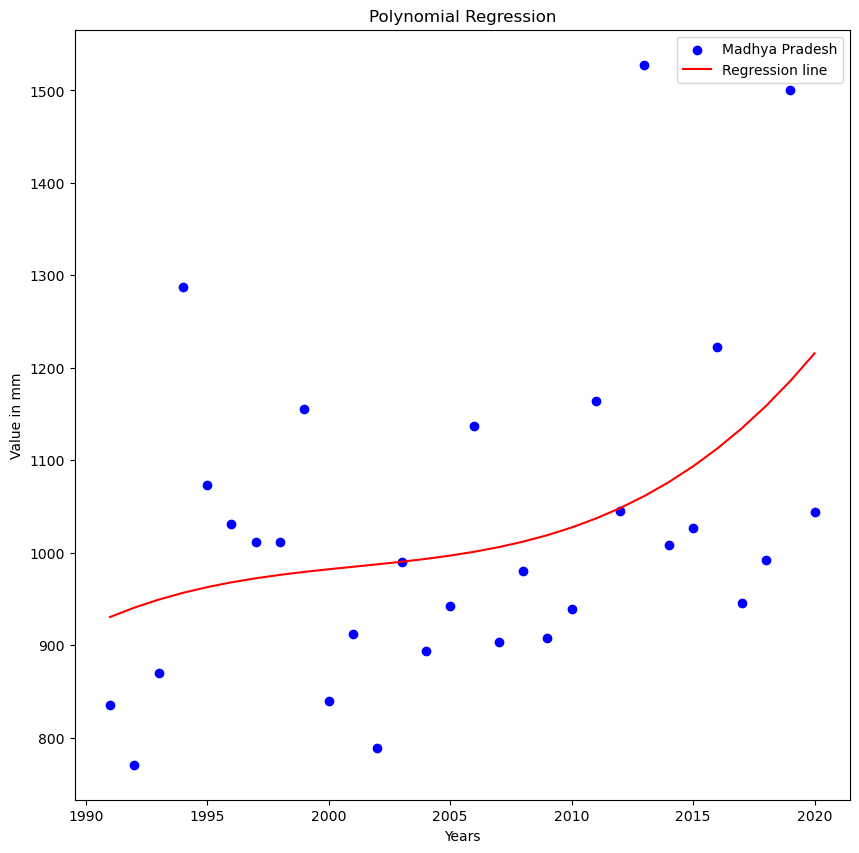

161.18153043524782
0.16940660980513222


array([1391.22636864])

In [57]:
polynomial_fit_rainfall(31) #10 index represents MP
goodness_fit_rainfall(31)
prediction_rainfall(9,2025)

### For Temperature

In [58]:
tem = temperature.copy(deep=True)
tem

,state,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,24.460,24.340,24.580,24.440,24.590,24.660,24.180,24.930,24.820,...,24.820,24.770,24.640,24.770,24.890,25.270,25.150,25.000,24.940,24.800
1,Andaman and Nicobar,27.290,26.900,27.170,27.070,27.150,26.940,27.100,27.500,26.680,...,27.150,27.470,27.400,27.440,27.650,27.690,27.580,27.320,27.760,27.800
2,Andhra Pradesh,27.428,27.128,27.370,27.268,27.376,27.288,27.466,27.842,27.308,...,27.506,27.746,27.580,27.686,27.740,27.966,27.826,27.788,28.012,27.956
3,Assam,22.660,22.460,22.740,23.130,23.340,23.180,22.540,23.500,23.770,...,23.530,23.050,23.140,23.520,23.250,23.580,23.570,23.210,23.440,23.330
4,Delhi,24.810,24.740,25.200,25.120,25.030,25.150,24.000,25.080,25.610,...,25.490,25.320,25.310,25.210,25.510,26.450,26.070,26.030,25.280,25.310
5,Goa,26.660,26.620,26.690,26.550,26.720,26.800,26.820,27.260,26.630,...,26.940,27.140,26.960,27.220,27.330,27.250,27.390,27.270,27.390,27.280
6,Gujarat,26.670,26.760,27.370,26.880,27.160,27.060,26.570,27.450,27.170,...,27.230,27.000,27.000,27.280,27.620,27.610,27.560,27.740,27.410,27.440
7,Haryana,24.630,24.480,24.990,24.930,24.790,24.820,23.740,24.890,25.440,...,25.270,25.090,25.200,25.010,25.240,26.170,25.840,25.840,25.060,25.090
8,Himachal Pradesh,18.330,18.012,18.382,18.852,18.878,18.738,18.074,18.980,19.342,...,19.096,18.780,18.898,19.212,18.902,19.190,19.242,18.908,19.170,19.062
9,Karnataka,25.990,25.830,25.900,25.790,25.930,25.990,26.120,26.480,25.850,...,26.160,26.390,26.180,26.410,26.460,26.510,26.590,26.440,26.670,26.510


In [59]:
def func2(value):
    f=temperature.iloc[value,1:]
    g=f.to_numpy() #conversion of series to array
    return g

In [60]:
list1=[]
for x in range(1991,2021):
    list1.append(x)
X=np.array(list1).reshape((-1,1))


In [61]:
def func1(value):
    sns.set(rc={'figure.figsize':(20,8)})
    sns.scatterplot(x=list1,y=func2(value))
    # sns.scatterplot(x=list1,y=list3,color='b')
    # sns.scatterplot(x=list1,y=list4,color='r')
    x=tem.iloc[value,0]
    plt.legend(labels=[x],loc='upper right')
    plt.xticks(list1)
    plt.xlabel("years")
    plt.ylabel("states")

This function is used to plot the scatter plot of data which takes state index as input

train and test split of the data is done 

In [62]:

def polynomial_fit(value): #value represents index value of state you want to fit a model
    X=np.array(list1).reshape((-1,1))
    y=func2(value)

 
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(X)
 
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    y_poly=lin2.predict(X_poly)
 
    plt.scatter(X, y, color = 'blue')
    plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
    
    plt.title('Polynomial Regression')
    x=tem.iloc[value,0]
    plt.legend(labels=[x,"Regression line"],loc='upper right')
    plt.xlabel('Years')
    plt.ylabel('Value in celsius')
    plt.show()


This function fits the polynomial regression of degree 3 to the data and the model is build

In [63]:
def goodness_fit(value): #value represents index value of state you want to fit a model
    X=np.array(list1).reshape((-1,1))
    y=func2(value)

 
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(X)
 
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    y_poly=lin2.predict(X_poly)
    rmse=np.sqrt(mean_squared_error(y,y_poly))
    r2=r2_score(y,y_poly)
    print(rmse)
    print(r2)



This function is used to check goodness of fit of the model that is build and returns r square value

In [64]:
def prediction_temperature(value,value1): #value represents index value of state you want to fit a model and value1 represents the year which you want to get predicted year temperature
    X=np.array(list1).reshape((-1,1))
    y=func2(value)

 
    poly = PolynomialFeatures(degree = 3)
    X_poly = poly.fit_transform(X)
 
    poly.fit(X_poly, y)
    lin2 = LinearRegression()
    lin2.fit(X_poly,y)
    y_poly=lin2.predict(X_poly)
    # Predicting a new result with Polynomial Regression after converting predict variable to 2D array
    pred2 = value1
    pred2array = np.array([[pred2]])
    l=lin2.predict(poly.fit_transform(pred2array))
    return l




THis function is used to predict value of temperature for particular year which takes state index and year as arguments and returns predicted value 

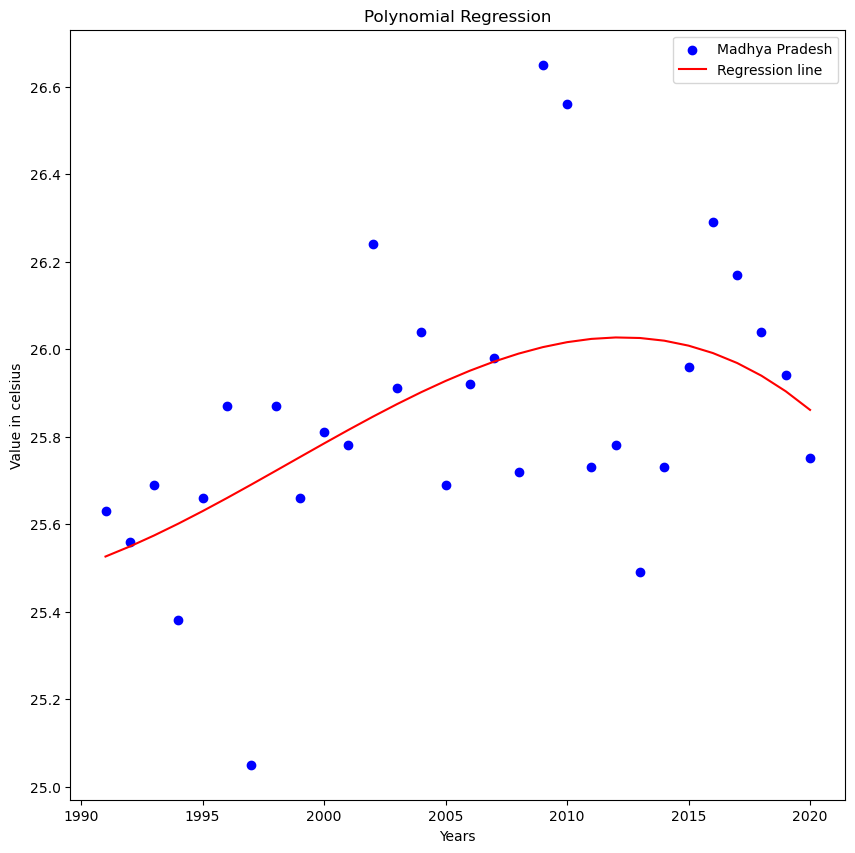

0.15183426506027572
0.5714617435052045


array([26.81562939])

In [65]:
polynomial_fit(31) #31 index represents Madhya Pradesh
goodness_fit(10)
prediction_temperature(9,2025)

For co2 levels

In [66]:
df=co2Levels
list1=[]
for x in range(1991,2021):
    list1.append(x)


X=np.array(list1).reshape((-1,1))
g=df.iloc[:,1:]
y=g.to_numpy()
y

array([[ 615924923],
       [ 656033132],
       [ 677916275],
       [ 716917563],
       [ 762120642],
       [ 825918856],
       [ 859686238],
       [ 877698067],
       [ 951748674],
       [ 978919215],
       [ 992560136],
       [1023027203],
       [1059616164],
       [1125471265],
       [1185953364],
       [1259744276],
       [1358152218],
       [1462814598],
       [1612816599],
       [1677887585],
       [1780129996],
       [1963586045],
       [2036937081],
       [2185855918],
       [2268567478],
       [2382223220],
       [2433855754],
       [2599805717],
       [2625968148],
       [2441792313]], dtype=int64)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

Spliting of train and test data

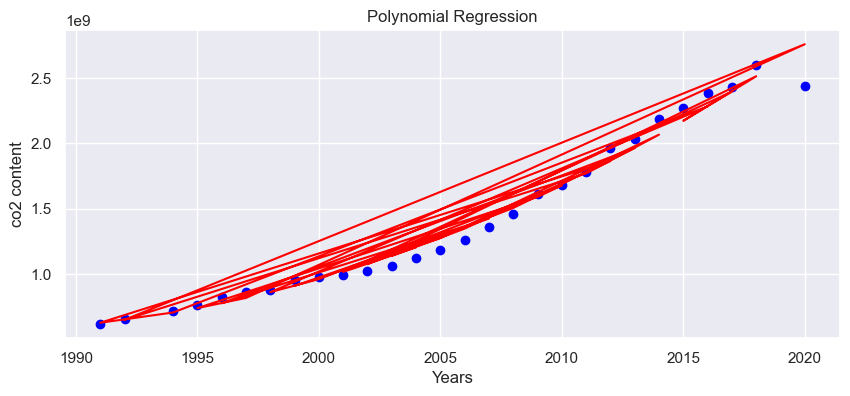

R square value is 
0.9811538148132432


In [68]:

X=X_train 
y=y_train
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)
y_poly=lin2.predict(X_poly)
sns.set(rc={'figure.figsize':(10,4)})
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')   
plt.title('Polynomial Regression')
plt.xlabel('Years')
plt.ylabel('co2 content')
plt.show()
rmse=np.sqrt(mean_squared_error(y,y_poly))
r2=r2_score(y,y_poly)
print("R square value is ")
print(r2)



Polynomial regresion of degree 2 is used for model building as after testing for various models this is the best model among all to predict the value and the accuracy of this model is around 98% as we have check goodnees of fit using R square method which is found to 0.98

In [69]:
pred2 = X_test
pred2array = np.array(pred2)
l=lin2.predict(poly.fit_transform(pred2array))
print(l)

[[6.76085296e+08]
 [2.63424905e+09]]


The predicted value by the model for the test data(x_test) matches with actual value(y_test) 

In [70]:
def predict_co2(x):
    x=X=np.array(x).reshape((-1,1))
    pred2 = x
    pred2array = np.array(pred2)
    l=lin2.predict(poly.fit_transform(pred2array))
    print(l)

Prediction function to predict the co2 level which takes year as input

In [71]:
predict_co2([2040])

[[6.01074768e+09]]


# Questions

## Which is the most suitable soil?

In [72]:
df=cropRecommedation.copy(deep=True)
df.head(5)

,index,label,N-max,N-min,P-max,P-min,K-max,K-min,temperature-max,temperature-min,...,black soil,clay soil,loam soil,laterite soil,arid soil,sandy,sandy clayey,sandy silty,loamy silty,sandy loam
0,0,apple,40,0,145,120,205,195,23.996862,21.036527,...,0,0,1,0,0,0,0,0,0,0
1,1,banana,120,80,95,70,55,45,29.908885,25.010185,...,0,0,1,0,0,0,0,0,0,0
2,2,blackgram,60,20,80,55,25,15,34.946616,25.097374,...,1,0,0,0,0,1,1,1,0,0
3,3,chickpea,60,20,80,55,85,75,20.995022,17.024985,...,1,0,1,0,0,0,0,0,0,0
4,4,coconut,40,0,30,5,35,25,29.869083,25.008724,...,0,0,1,1,0,1,0,1,0,1


In [73]:
dropColumns = ['label','N-max','N-min','P-max','P-min','K-max','K-min','temperature-max','temperature-min','ph-max','ph-min','rainfall-max','rainfall-min','humidity-max','humidity-min']

In [74]:
df.drop(dropColumns,axis=1,inplace=True)

In [75]:
df=df.reset_index(drop=True)

In [76]:
df['index']=1
df=df.groupby('index').sum()
df=df.T 
df.sort_values(by=1,inplace=True,ascending=False)
soilvariety=df
soilvariety

index,1
sand loamy clayey soil,23
loam soil,23
loamy clayey soil,16
silt loamy clayey soil,16
black soil,16
sandy loam,15
red yellow soil,13
clay soil,12
sandy silty,11
sandy clayey,10


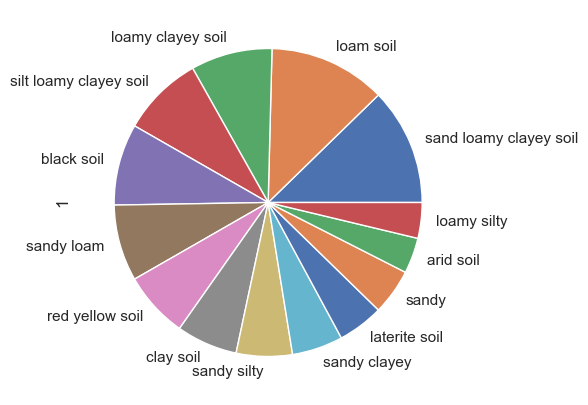

In [77]:
plot = soilvariety.plot.pie(y=1, figsize=(5, 5),legend=None)

Further Inference

<AxesSubplot:xlabel='State_Name'>

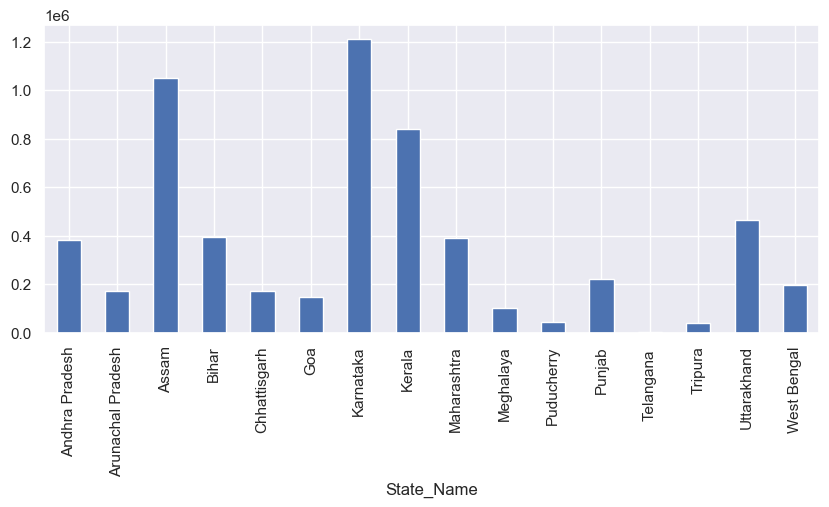

In [78]:
df = cropsProduction.drop(cropsProduction[cropsProduction['Crop_Year'] != 2014].index)
df = df.groupby(['State_Name'])['Production'].sum()
df.reset_index()
df.plot(kind='bar')


### Hence loam soils and aluvial soil are the most versatile

### Relation between temperature and rainfall influenced by gas levels

In [79]:
state = "Assam"

<AxesSubplot:title={'center':'Rainfall in Assam'}, xlabel='Year', ylabel='Rainfall'>

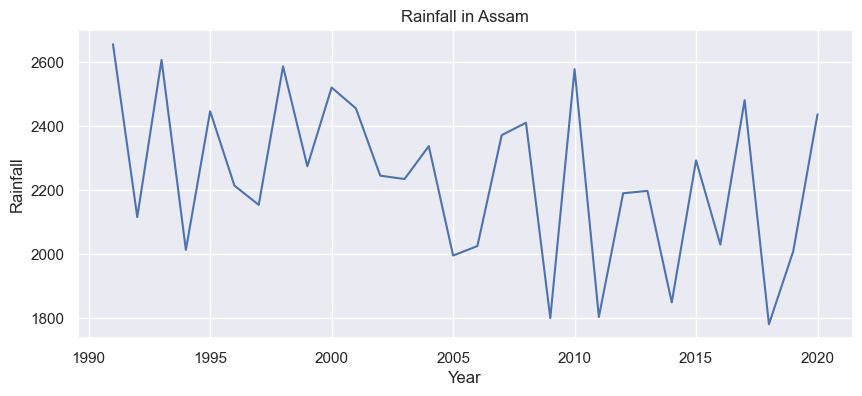

In [80]:
df = rainfall.copy(deep=True)
df.drop(df[df['state']!=state].index,inplace=True)
df.drop(['state'],axis=1,inplace=True)
df=df.T
df.plot.line(title="Rainfall in "+state,xlabel='Year', ylabel='Rainfall',legend=None)

In [81]:
# 4
state = 'Uttarakhand'

<AxesSubplot:title={'center':'Temperature in Uttarakhand'}, xlabel='Year', ylabel='Temperature'>

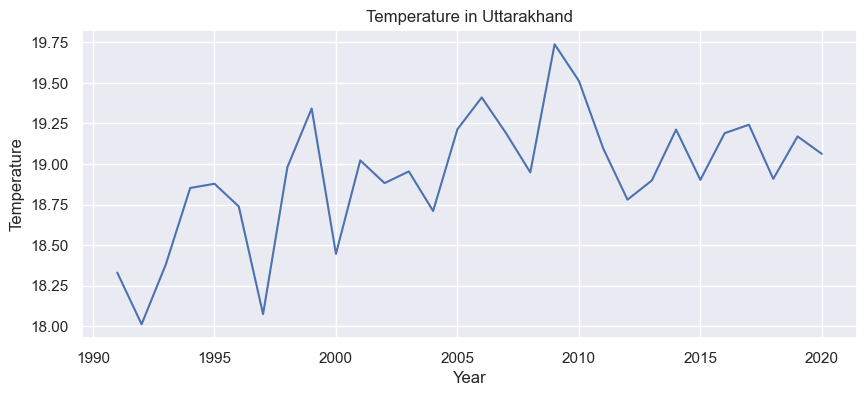

In [82]:
df = temperature.copy(deep=True)
df.drop(df[df['state']!=state].index,inplace=True)
df.drop(['state'],axis=1,inplace=True)
df=df.T
df.plot.line(xlabel='Year', ylabel='Temperature',legend=None,title="Temperature in "+state)

Further Inference

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

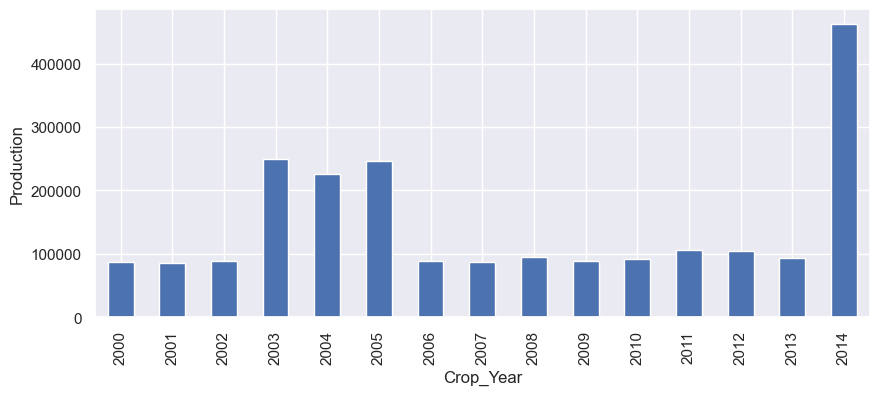

In [83]:
df = cropsProduction[cropsProduction['State_Name']=='Uttarakhand']
df=df.drop(df[df['Crop_Year']==1997].index)
df=df.groupby(['Crop_Year'])['Production'].sum()
df.plot(kind='bar',ylabel='Production')

## Which crops are the most versatile with respect to soil?

In [84]:
df=cropRecommedation.copy(deep=True)
df.head(5)

,index,label,N-max,N-min,P-max,P-min,K-max,K-min,temperature-max,temperature-min,...,black soil,clay soil,loam soil,laterite soil,arid soil,sandy,sandy clayey,sandy silty,loamy silty,sandy loam
0,0,apple,40,0,145,120,205,195,23.996862,21.036527,...,0,0,1,0,0,0,0,0,0,0
1,1,banana,120,80,95,70,55,45,29.908885,25.010185,...,0,0,1,0,0,0,0,0,0,0
2,2,blackgram,60,20,80,55,25,15,34.946616,25.097374,...,1,0,0,0,0,1,1,1,0,0
3,3,chickpea,60,20,80,55,85,75,20.995022,17.024985,...,1,0,1,0,0,0,0,0,0,0
4,4,coconut,40,0,30,5,35,25,29.869083,25.008724,...,0,0,1,1,0,1,0,1,0,1


In [85]:
dropColumns = ['index','N-max','N-min','P-max','P-min','K-max','K-min','temperature-max','temperature-min','ph-max','ph-min','rainfall-max','rainfall-min','humidity-max','humidity-min']

In [86]:
df.drop(dropColumns,axis=1,inplace=True)
df['sum'] = df.sum(axis=1)
df.sort_values(by='sum',inplace=True,ascending=False)
df = df[['label','sum']].copy().reset_index(drop=True)
df

C:\Users\sitan\AppData\Local\Temp\ipykernel_15824\1066549309.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['sum'] = df.sum(axis=1)


,label,sum
0,barley,13
1,millets,10
2,maize,7
3,coconut,7
4,wheat,7
5,cotton,7
6,grapes,7
7,lentil,7
8,oil seeds,6
9,hazelnuts,6


<AxesSubplot:ylabel='sum'>

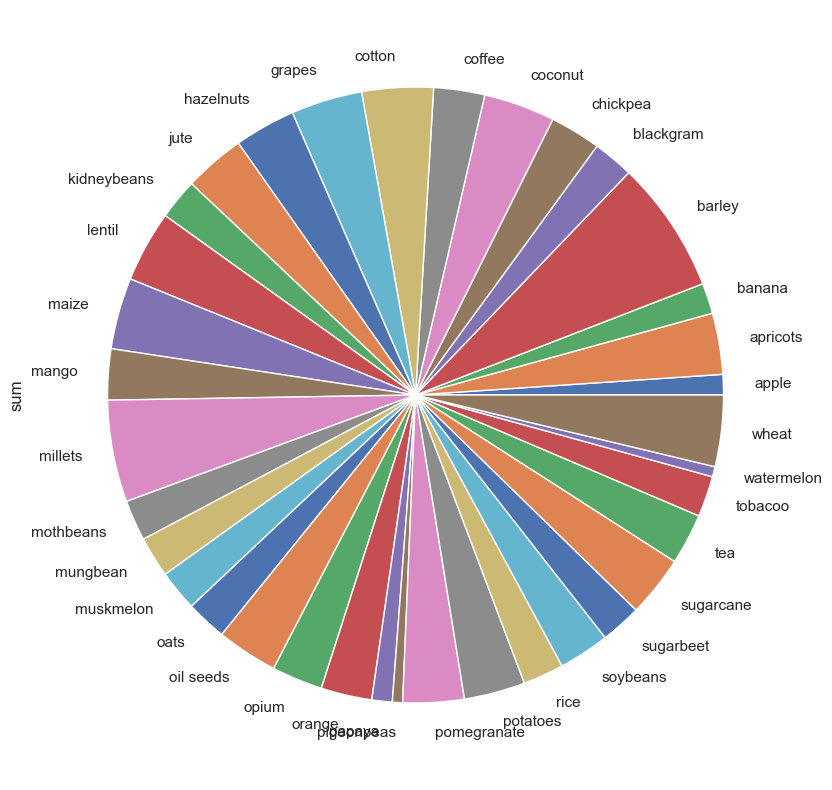

In [87]:
df.groupby('label').sum().plot(kind='pie', y='sum', figsize=(10, 10),legend=None)

### Bareley and Millets are the most versatile Crops

## Crop Recommendation for a given state and year

In [88]:
df=rainfall.copy(deep=True)
df1=temperature.copy(deep=True)
df2=cropRecommedation.copy(deep=True)
df3=soil.copy(deep=True)

In [89]:
def get_crops(sta,yea):                   # sta is the state name and yea is the year
    temp=df1.loc[df1['state'] == sta] 
    ind=temp.index                        # prediction of temperature for a given state in the given year
    ind=ind[0]
    pred2=prediction_temperature(ind,yea)
    pred2=pred2[0]

    temp=df.loc[df['state'] == sta]
    ind=temp.index                        # prediction of rainfall for a given state in the given year
    ind=ind[0]
    pred1=prediction_rainfall(ind,yea)
    pred1=pred1[0]

    t1 = df2[df2['temperature-min'] < pred2]    # considering predicted value of temperature for that state in that year
    t1 = t1[t1['temperature-max'] > pred2]
    t1 = t1[t1['rainfall-max'] > pred1]
    t1 = t1[t1['rainfall-min'] < pred1]         # considering predicted value of rainfall for that state in that year
    
    cur=df3[df3['State']==sta]
    soil_list=[0]*15
    for i in range(0,14):
        arb=cur.columns[i]
        arb1=cur[arb]                            #getting the most prominent soils in the given state
        arb1=np.array(arb1)
        if(1 in arb1):
             soil_list[i]=arb
                
    res1 = [idx for idx, val in enumerate(soil_list) if val != 0]
    size=len(res1)
    res=[0]*size
    for j in range(0,size):
        res[j]=soil_list[res1[j]]
        
    for j in range(0,size):
        crops_to_grow=t1[t1[res[j]]==1]        # Finally recomending a crop based on rainfall,temperature and soil
        return crops_to_grow

In [90]:
sta='Karnataka'
yea=2025 
crops = get_crops(sta,yea)
crops

,index,label,N-max,N-min,P-max,P-min,K-max,K-min,temperature-max,temperature-min,...,black soil,clay soil,loam soil,laterite soil,arid soil,sandy,sandy clayey,sandy silty,loamy silty,sandy loam
5,5,coffee,120,80,40,15,35,25,27.923744,23.059519,...,0,0,0,1,0,0,0,0,1,1
26,26,sugarcane,336,250,100,90,150,90,30.000000,20.000000,...,1,1,1,0,0,0,0,0,0,0


### How to determine economical crops to grow?

In [91]:
N=100
K=60
P=50
pH=6.8

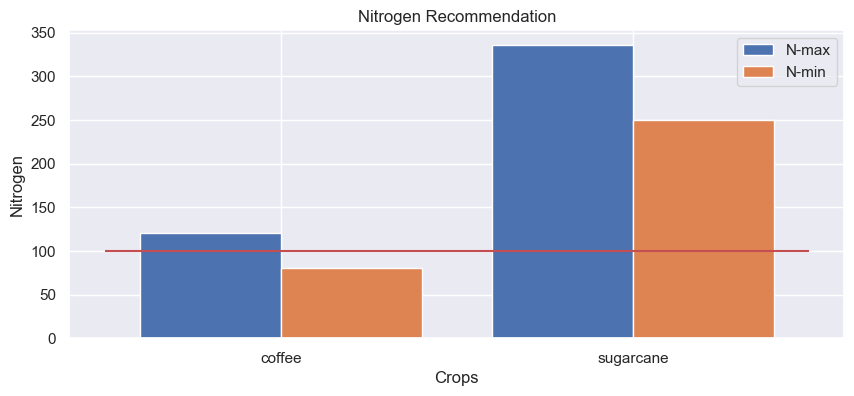

In [92]:
X = crops['label'].tolist()
Y = crops['N-max'].tolist()
Z = crops['N-min'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'N-max')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'N-min')
  
plt.xticks(X_axis, X)
plt.xlabel("Crops")
plt.ylabel("Nitrogen")
plt.title("Nitrogen Recommendation")
plt.legend()
plt.hlines(N, 0-0.5, len(X)-0.5,color = 'r', label = 'N-max')
plt.plot()
plt.show()

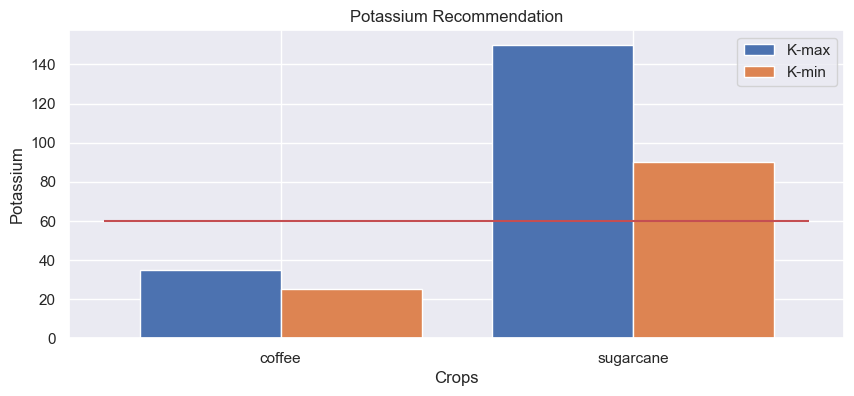

In [93]:
X = crops['label'].tolist()
Y = crops['K-max'].tolist()
Z = crops['K-min'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'K-max')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'K-min')
  
plt.xticks(X_axis, X)
plt.xlabel("Crops")
plt.ylabel("Potassium")
plt.title("Potassium Recommendation")
plt.legend()
plt.hlines(K, 0-0.5, len(X)-0.5,color = 'r', label = 'K-max')
plt.show()

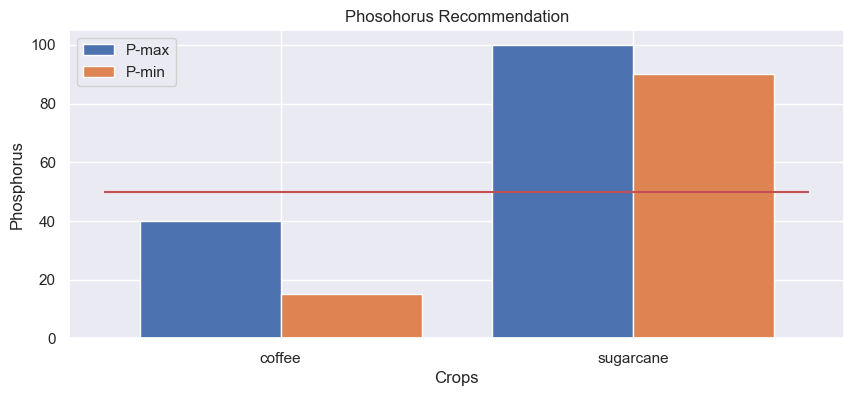

In [94]:
X = crops['label'].tolist()
Y = crops['P-max'].tolist()
Z = crops['P-min'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'P-max')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'P-min')
  
plt.xticks(X_axis, X)
plt.xlabel("Crops")
plt.ylabel("Phosphorus")
plt.title("Phosohorus Recommendation")
plt.legend()
plt.hlines(P, 0-0.5, len(X)-0.5,color = 'r', label = 'P-max')
plt.show()

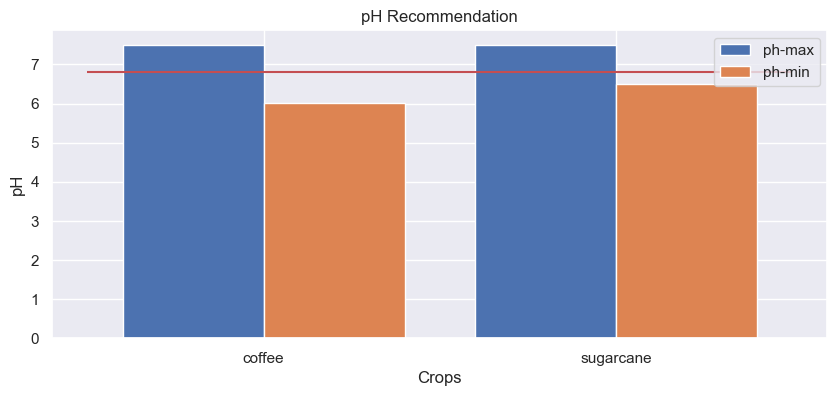

In [95]:
X = crops['label'].tolist()
Y = crops['ph-max'].tolist()
Z = crops['ph-min'].tolist()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'ph-max')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'ph-min')
  
plt.xticks(X_axis, X)
plt.xlabel("Crops")
plt.ylabel("pH")
plt.title("pH Recommendation")
plt.legend()
plt.hlines(pH, 0-0.5, len(X)-0.5,color = 'r', label = 'pH-max')
plt.show()

In [96]:
def func4(value):
    f=temperature.iloc[value,1:]
    g=f.to_numpy() #conversion of series to array
    return g

Modification:-To show how temperature rainfall are related to co2 in karnataka

In [125]:
def func_temperature(value):
    sns.set(rc={'figure.figsize':(20,8)})
    sns.lineplot(x=list1,y=func4(value))
    x=temperature.iloc[value,0]
    plt.legend(labels=[x],loc='upper right')
    plt.xticks(list1)
    plt.xlabel("years")
    plt.ylabel("value in celsius")

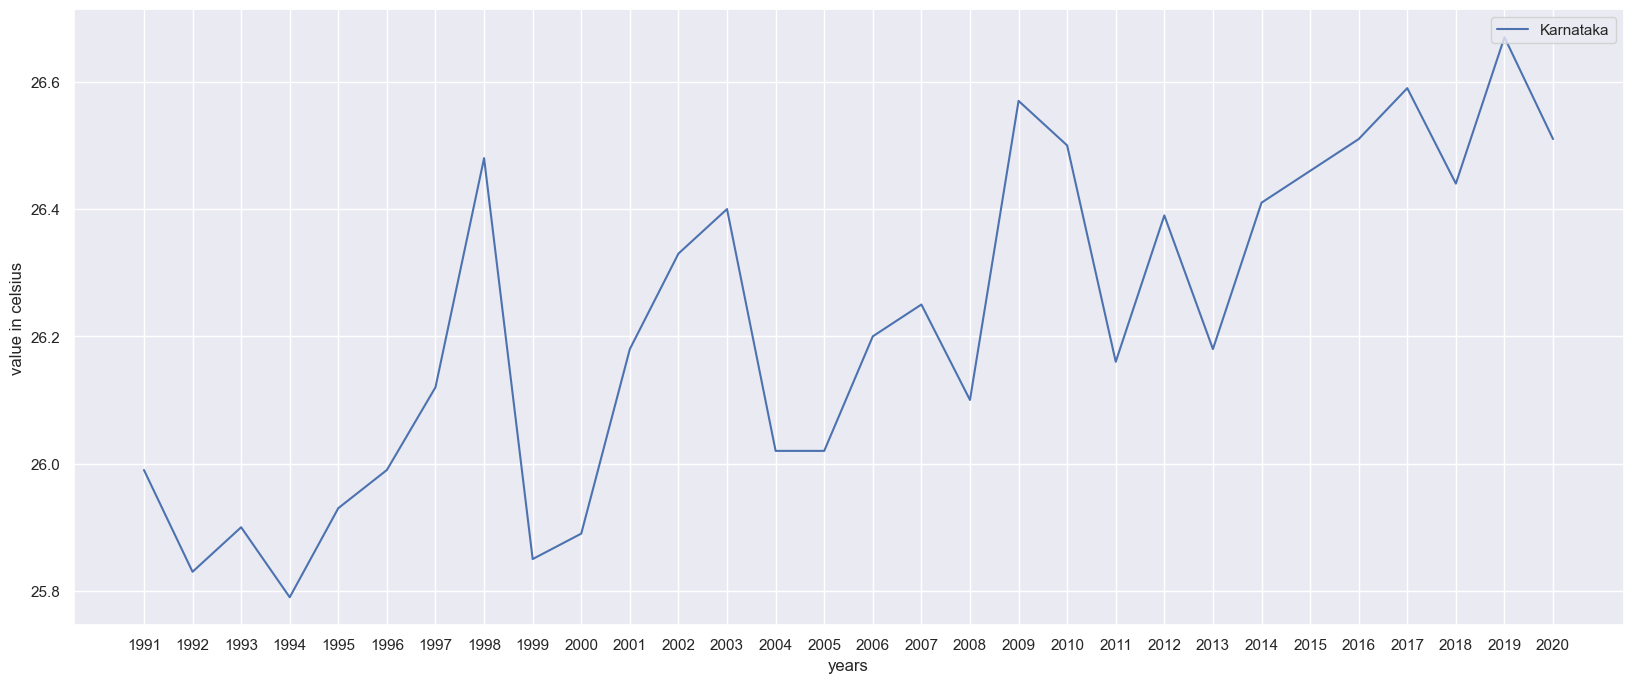

In [126]:
func_temperature(9)

In [105]:
def func5(value):
    f=rainfall.iloc[value,1:]
    g=f.to_numpy() #conversion of series to array
    return g

In [106]:
def func(value):
    sns.set(rc={'figure.figsize':(20,8)})
    sns.lineplot(x=list1,y=func5(value))
    x=rainfall.iloc[value,0]
    plt.legend(labels=[x],loc='upper right')
    plt.xticks(list1)
    plt.xlabel("years")
    plt.ylabel("value in mm")

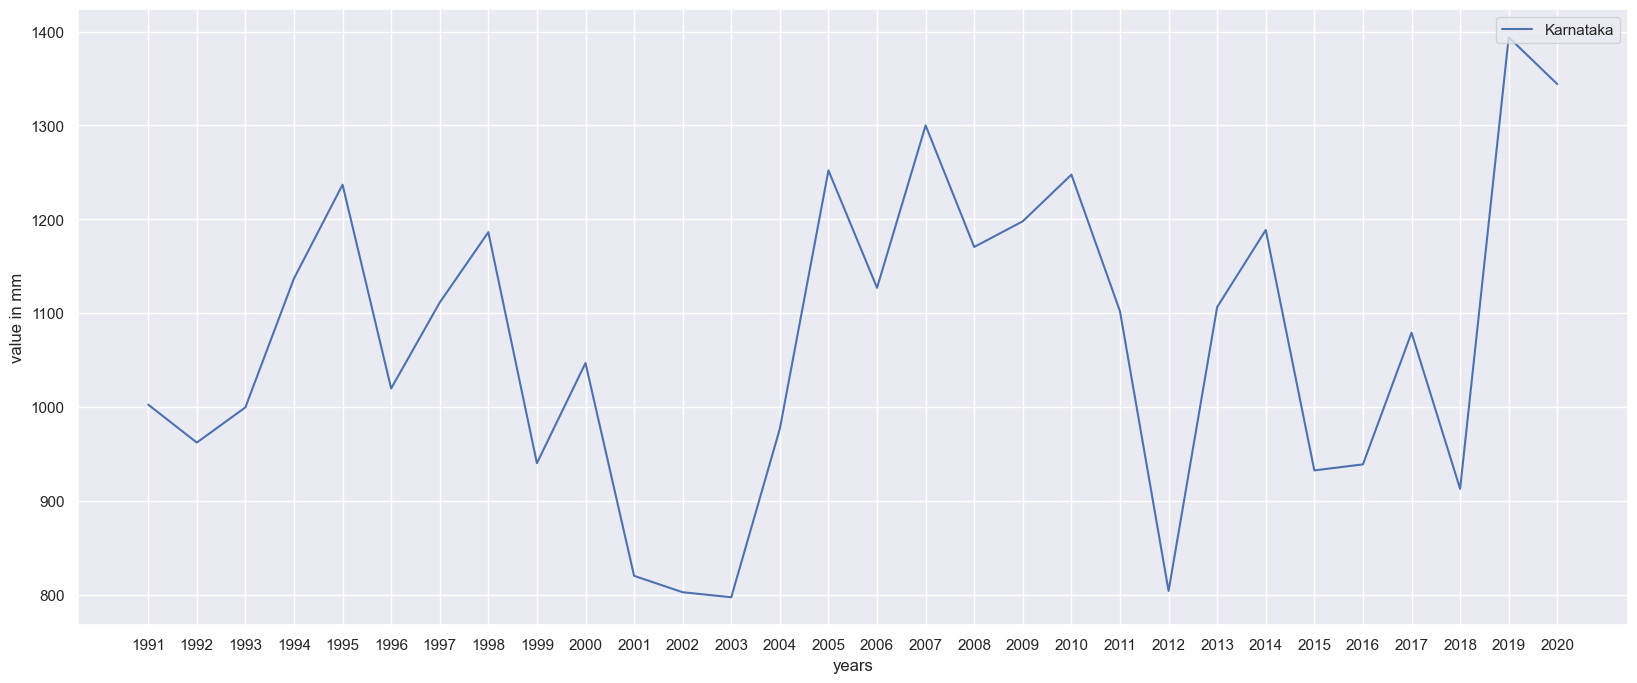

In [107]:
func(9)

Text(0, 0.5, 'value in cubic meteres')

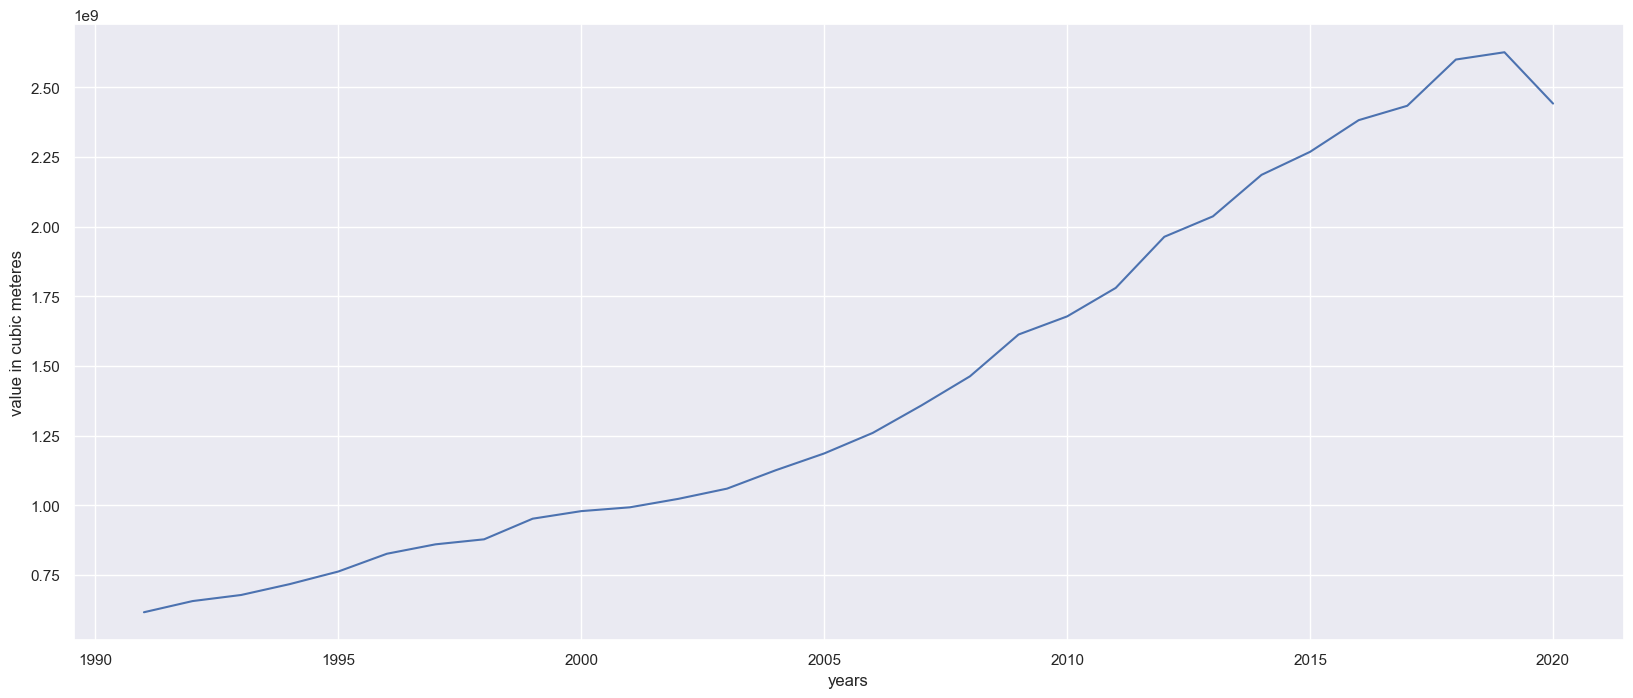

In [121]:
f=co2Levels.iloc[:,2:]
g=f.to_numpy() 
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x=x1,y=y1)
plt.xlabel("years")
plt.ylabel("value in cubic meteres")

In [118]:
y1=co2Levels['Annual CO2 emissions']
x1=co2Levels['Year']

In [109]:
co2Levels

,Year,Annual CO2 emissions
0,1991,615924923
1,1992,656033132
2,1993,677916275
3,1994,716917563
4,1995,762120642
5,1996,825918856
6,1997,859686238
7,1998,877698067
8,1999,951748674
9,2000,978919215
